## Import Data from Elexon

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from decimal import Decimal

NFlGB2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20210101-20211231.csv")

NFlGB2021 = NFlGB2021.replace('n/e', np.NaN)
NFlGB2021 = NFlGB2021.replace('N/A', np.NaN)

NFlGB2021 = pd.DataFrame({'Date': NFlGB2021.iloc[:,1],
                          'SP': NFlGB2021.iloc[:,2],
                          'IFA 1 [MW]': NFlGB2021.iloc[:,12],
                          'Moyle [MW]': NFlGB2021.iloc[:,13],
                          'BritNed [MW]': NFlGB2021.iloc[:,14],
                          'East-West [MW]': NFlGB2021.iloc[:,15],
                          'Nemo Link [MW]': NFlGB2021.iloc[:,17],
                          'ElecLink [MW]': NFlGB2021.iloc[:,18],
                          'IFA 2 [MW]': NFlGB2021.iloc[:,19],
                          'North Sea Link [MW]': NFlGB2021.iloc[:,20]})

print(NFlGB2021.to_string())

           Date  SP  IFA 1 [MW]  Moyle [MW]  BritNed [MW]  East-West [MW]  Nemo Link [MW]  ElecLink [MW]  IFA 2 [MW]  North Sea Link [MW]
0      20210101   1        2004         220             0             204            1000              0           0                    0
1      20210101   2        2004         364             0             204            1000              0           0                    0
2      20210101   3        2004         362             0             204            1000              0           0                    0
3      20210101   4        2004         360             0             204            1000              0           0                    0
4      20210101   5        2004         304             0             204            1000              0           0                    0
5      20210101   6        2002         318             0             204            1000              0           0                    0
6      20210101   7        1806   

In [4]:


def function():
    result = []
    for i in range(0, len(NFlGB2021.iloc[:,0])):
        if i < 86:
            start = 48*i
            end = 48*(i+1)
            day = NFlGB2021.iloc[start,0]
            opIF1 = sum(NFlGB2021.iloc[start:end,2])/2
            opMOY = sum(NFlGB2021.iloc[start:end,3])/2
            opBND = sum(NFlGB2021.iloc[start:end,4])/2
            opEWT = sum(NFlGB2021.iloc[start:end,5])/2
            opNEM = sum(NFlGB2021.iloc[start:end,6])/2
            opELC = sum(NFlGB2021.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2021.iloc[start:end,8])/2
            opNSL = sum(NFlGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
        elif i == 86:
            start = 48*i
            end = 4174
            day = NFlGB2021.iloc[start,0]
            opIF1 = sum(NFlGB2021.iloc[start:end,2])/2
            opMOY = sum(NFlGB2021.iloc[start:end,3])/2
            opBND = sum(NFlGB2021.iloc[start:end,4])/2
            opEWT = sum(NFlGB2021.iloc[start:end,5])/2
            opNEM = sum(NFlGB2021.iloc[start:end,6])/2
            opELC = sum(NFlGB2021.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2021.iloc[start:end,8])/2
            opNSL = sum(NFlGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
        elif 87 <= i < 303:
            start = 48*i-2
            end = 48*(i+1)-2
            day = NFlGB2021.iloc[start,0]
            opIF1 = sum(NFlGB2021.iloc[start:end,2])/2
            opMOY = sum(NFlGB2021.iloc[start:end,3])/2
            opBND = sum(NFlGB2021.iloc[start:end,4])/2
            opEWT = sum(NFlGB2021.iloc[start:end,5])/2
            opNEM = sum(NFlGB2021.iloc[start:end,6])/2
            opELC = sum(NFlGB2021.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2021.iloc[start:end,8])/2
            opNSL = sum(NFlGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
        elif i == 303:
            start = 48*i
            end = 14592
            day = NFlGB2021.iloc[start,0]
            opIF1 = sum(NFlGB2021.iloc[start:end,2])/2
            opMOY = sum(NFlGB2021.iloc[start:end,3])/2
            opBND = sum(NFlGB2021.iloc[start:end,4])/2
            opEWT = sum(NFlGB2021.iloc[start:end,5])/2
            opNEM = sum(NFlGB2021.iloc[start:end,6])/2
            opELC = sum(NFlGB2021.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2021.iloc[start:end,8])/2
            opNSL = sum(NFlGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
        elif 304 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = NFlGB2021.iloc[start,0]
            opIF1 = sum(NFlGB2021.iloc[start:end,2])/2
            opMOY = sum(NFlGB2021.iloc[start:end,3])/2
            opBND = sum(NFlGB2021.iloc[start:end,4])/2
            opEWT = sum(NFlGB2021.iloc[start:end,5])/2
            opNEM = sum(NFlGB2021.iloc[start:end,6])/2
            opELC = sum(NFlGB2021.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2021.iloc[start:end,8])/2
            opNSL = sum(NFlGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
    df = pd.DataFrame(result, columns=['Day','IFA 1 [MWh]','Moyle [MWh]', 'BritNed [MWh]',
                                       'East-West [MWh]', 'Nemo Link [MWh]', 'ElecLink [MWh]',
                                       'IFA 2 [MWh]', 'North Sea Link [MWh]'])
    return df

GBNFl2021 = function().round(2)
GBNFl2021["Day"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
print(GBNFl2021.to_string())

           Day  IFA 1 [MWh]  Moyle [MWh]  BritNed [MWh]  East-West [MWh]  Nemo Link [MWh]  ElecLink [MWh]  IFA 2 [MWh]  North Sea Link [MWh]
0   2021-01-01      47298.0       5587.0            0.0           2610.0          23491.0             0.0          0.0                   0.0
1   2021-01-02      47493.0        571.0            0.0              0.0          23078.0             0.0          0.0                   0.0
2   2021-01-03      45160.0       1098.0            0.0             44.0          22707.0             0.0          0.0                   0.0
3   2021-01-04      31141.0        679.0            0.0              9.0          21418.0             0.0          0.0                   0.0
4   2021-01-05      37944.0        137.0            1.0              6.0          13706.0             0.0          0.0                   0.0
5   2021-01-06      41278.0        396.0            1.0             19.0          19307.0             0.0          0.0                   0.0
6   2021-01-0

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from decimal import Decimal

NFlGB2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20220101-20221231.csv")

NFlGB2022 = NFlGB2022.replace('n/e', np.NaN)
NFlGB2022 = NFlGB2022.replace('N/A', np.NaN)

NFlGB2022 = pd.DataFrame({'Date': NFlGB2022.iloc[:,1],
                          'SP': NFlGB2022.iloc[:,2],
                          'IFA 1 [MW]': NFlGB2022.iloc[:,12],
                          'Moyle [MW]': NFlGB2022.iloc[:,13],
                          'BritNed [MW]': NFlGB2022.iloc[:,14],
                          'East-West [MW]': NFlGB2022.iloc[:,15],
                          'Nemo Link [MW]': NFlGB2022.iloc[:,17],
                          'ElecLink [MW]': NFlGB2022.iloc[:,18],
                          'IFA 2 [MW]': NFlGB2022.iloc[:,19],
                          'North Sea Link [MW]': NFlGB2022.iloc[:,20]})

print(NFlGB2022.to_string())

           Date  SP  IFA 1 [MW]  Moyle [MW]  BritNed [MW]  East-West [MW]  Nemo Link [MW]  ElecLink [MW]  IFA 2 [MW]  North Sea Link [MW]
0      20220101   1           0         320           584             388               0              0           0                  210
1      20220101   2           0         320           584             402               0              0           0                  194
2      20220101   3           0         320           568             440               0              0           0                    0
3      20220101   4           0         320           418             388               0              0           0                    0
4      20220101   5           0         320             0             476               0              0           0                    0
5      20220101   6           0         302             0             382               0              0           0                    0
6      20220101   7           0   

In [6]:
def function():
    result = []
    for i in range(0, len(NFlGB2022.iloc[:,0])):
        if i < 85:
            start = 48*i
            end = 48*(i+1)
            day = NFlGB2022.iloc[start,0]
            opIF1 = sum(NFlGB2022.iloc[start:end,2])/2
            opMOY = sum(NFlGB2022.iloc[start:end,3])/2
            opBND = sum(NFlGB2022.iloc[start:end,4])/2
            opEWT = sum(NFlGB2022.iloc[start:end,5])/2
            opNEM = sum(NFlGB2022.iloc[start:end,6])/2
            opELC = sum(NFlGB2022.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2022.iloc[start:end,8])/2
            opNSL = sum(NFlGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
        elif i == 85:
            start = 48*i
            end = 4174
            day = NFlGB2022.iloc[start,0]
            opIF1 = sum(NFlGB2022.iloc[start:end,2])/2
            opMOY = sum(NFlGB2022.iloc[start:end,3])/2
            opBND = sum(NFlGB2022.iloc[start:end,4])/2
            opEWT = sum(NFlGB2022.iloc[start:end,5])/2
            opNEM = sum(NFlGB2022.iloc[start:end,6])/2
            opELC = sum(NFlGB2022.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2022.iloc[start:end,8])/2
            opNSL = sum(NFlGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
        elif 86 <= i < 302:
            start = 48*i-2
            end = 48*(i+1)-2
            day = NFlGB2022.iloc[start,0]
            opIF1 = sum(NFlGB2022.iloc[start:end,2])/2
            opMOY = sum(NFlGB2022.iloc[start:end,3])/2
            opBND = sum(NFlGB2022.iloc[start:end,4])/2
            opEWT = sum(NFlGB2022.iloc[start:end,5])/2
            opNEM = sum(NFlGB2022.iloc[start:end,6])/2
            opELC = sum(NFlGB2022.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2022.iloc[start:end,8])/2
            opNSL = sum(NFlGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
        elif i == 302:
            start = 48*i-2
            end = 14544
            day = NFlGB2022.iloc[start,0]
            opIF1 = sum(NFlGB2022.iloc[start:end,2])/2
            opMOY = sum(NFlGB2022.iloc[start:end,3])/2
            opBND = sum(NFlGB2022.iloc[start:end,4])/2
            opEWT = sum(NFlGB2022.iloc[start:end,5])/2
            opNEM = sum(NFlGB2022.iloc[start:end,6])/2
            opELC = sum(NFlGB2022.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2022.iloc[start:end,8])/2
            opNSL = sum(NFlGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
        elif 303 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = NFlGB2022.iloc[start,0]
            opIF1 = sum(NFlGB2022.iloc[start:end,2])/2
            opMOY = sum(NFlGB2022.iloc[start:end,3])/2
            opBND = sum(NFlGB2022.iloc[start:end,4])/2
            opEWT = sum(NFlGB2022.iloc[start:end,5])/2
            opNEM = sum(NFlGB2022.iloc[start:end,6])/2
            opELC = sum(NFlGB2022.iloc[start:end,7])/2
            opIF2 = sum(NFlGB2022.iloc[start:end,8])/2
            opNSL = sum(NFlGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "IFA 1 [MWh]": opIF1, "Moyle [MWh]": opMOY, "BritNed [MWh]": opBND,
                           "East-West [MWh]": opEWT, "Nemo Link [MWh]": opNEM, "ElecLink [MWh]": opELC,
                           "IFA 2 [MWh]": opIF2, "North Sea Link [MWh]": opNSL})
    df = pd.DataFrame(result, columns=['Day','IFA 1 [MWh]','Moyle [MWh]', 'BritNed [MWh]',
                                       'East-West [MWh]', 'Nemo Link [MWh]', 'ElecLink [MWh]',
                                       'IFA 2 [MWh]', 'North Sea Link [MWh]'])
    return df

GBNFl2022 = function().round(2)
GBNFl2022["Day"] = pd.date_range(start="1/1/2022", periods=365, freq="D")

GBNFl2022.iloc[85, 1:] = GBNFl2022.iloc[85, 1:]/2

print(GBNFl2022.to_string())

           Day  IFA 1 [MWh]  Moyle [MWh]  BritNed [MWh]  East-West [MWh]  Nemo Link [MWh]  ElecLink [MWh]  IFA 2 [MWh]  North Sea Link [MWh]
0   2022-01-01       1789.0       2723.0         5072.0           2576.0          10011.0             0.0          0.0                3485.0
1   2022-01-02       5359.0       3851.0        10786.0            434.0          12865.0             0.0          0.0                 697.0
2   2022-01-03       9868.0       2153.0         7603.0           2314.0          13868.0             0.0       6870.0                2927.0
3   2022-01-04      15260.0       1514.0         9711.0            190.0          16965.0             0.0      15894.0               11420.0
4   2022-01-05      16669.0        214.0        18559.0            124.0          19825.0             0.0      15723.0               13177.0
5   2022-01-06      14445.0       6191.0        14690.0           5454.0          16276.0             0.0      14254.0               16078.0
6   2022-01-0

In [7]:
GBNFl = pd.concat([GBNFl2021["IFA 1 [MWh]"], GBNFl2022["IFA 1 [MWh]"]], ignore_index=True).to_frame("IFA 1 [MWh]")
GBNFl["Moyle [MWh]"] = pd.concat([GBNFl2021["Moyle [MWh]"], GBNFl2022["Moyle [MWh]"]], ignore_index=True).to_frame("Moyle [MWh]")
GBNFl["BritNed [MWh]"] = pd.concat([GBNFl2021["BritNed [MWh]"], GBNFl2022["BritNed [MWh]"]], ignore_index=True).to_frame("BritNed [MWh]")
GBNFl["East-West [MWh]"] = pd.concat([GBNFl2021["East-West [MWh]"], GBNFl2022["East-West [MWh]"]], ignore_index=True).to_frame("East-West [MWh]")
GBNFl["Nemo Link [MWh]"] = pd.concat([GBNFl2021["Nemo Link [MWh]"], GBNFl2022["Nemo Link [MWh]"]], ignore_index=True).to_frame("Nemo Link [MWh]")
GBNFl["ElecLink [MWh]"] = pd.concat([GBNFl2021["ElecLink [MWh]"], GBNFl2022["ElecLink [MWh]"]], ignore_index=True).to_frame("ElecLink [MWh]")
GBNFl["IFA 2 [MWh]"] = pd.concat([GBNFl2021["IFA 2 [MWh]"], GBNFl2022["IFA 2 [MWh]"]], ignore_index=True).to_frame("IFA 2 [MWh]")
GBNFl["North Sea Link [MWh]"] = pd.concat([GBNFl2021["North Sea Link [MWh]"], GBNFl2022["North Sea Link [MWh]"]], ignore_index=True).to_frame("North Sea Link [MWh]")
GBNFl["Total [MWh]"] = (GBNFl["IFA 1 [MWh]"] + GBNFl["Moyle [MWh]"] + GBNFl["BritNed [MWh]"]
                        + GBNFl["East-West [MWh]"] + GBNFl["Nemo Link [MWh]"] + GBNFl["ElecLink [MWh]"]
                        + GBNFl["IFA 2 [MWh]"] + GBNFl["North Sea Link [MWh]"])
GBNFl["France (FR) [MWh]"] = GBNFl["IFA 1 [MWh]"] + GBNFl["ElecLink [MWh]"] + GBNFl["IFA 2 [MWh]"]
GBNFl["Ireland (SEM) [MWh]"] = GBNFl["Moyle [MWh]"] + GBNFl["East-West [MWh]"]
GBNFl["European Mainland (FR, BE, NL) [MWh]"] = (GBNFl["IFA 1 [MWh]"] + GBNFl["BritNed [MWh]"]
                        + GBNFl["Nemo Link [MWh]"] + GBNFl["ElecLink [MWh]"] + GBNFl["IFA 2 [MWh]"])

GBNFl["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "IFA 1 [MWh]", "Moyle [MWh]", "BritNed [MWh]", "East-West [MWh]",
            "Nemo Link [MWh]", "ElecLink [MWh]", "IFA 2 [MWh]", "North Sea Link [MWh]",
            "Total [MWh]", "France (FR) [MWh]", "Ireland (SEM) [MWh]", "European Mainland (FR, BE, NL) [MWh]"]

#GBNFl["IFA 1 [MWh]"] = pd.to_numeric(GBNFl["IFA 1 [MWh]"], errors='coerce')
GBNFl = pd.DataFrame(GBNFl)

#GBNFl["BZN|FR"] = GBNFl["BZN|FR"].round(2)

GBNFl = GBNFl.reindex(columns=NewOrder)

%store GBNFl

print(GBNFl.dtypes)

Stored 'GBNFl' (DataFrame)
Date                                    datetime64[ns]
IFA 1 [MWh]                                    float64
Moyle [MWh]                                    float64
BritNed [MWh]                                  float64
East-West [MWh]                                float64
Nemo Link [MWh]                                float64
ElecLink [MWh]                                 float64
IFA 2 [MWh]                                    float64
North Sea Link [MWh]                           float64
Total [MWh]                                    float64
France (FR) [MWh]                              float64
Ireland (SEM) [MWh]                            float64
European Mainland (FR, BE, NL) [MWh]           float64
dtype: object


In [8]:
IntCap = pd.DataFrame({"Date": pd.date_range(start="1/1/2021", periods=730, freq="D")})
IntCap["IFA 1 [MWh]"] = pd.Series([2000*24 for x in range(len(IntCap.index))])
IntCap["Moyle [MWh]"] = pd.Series([500*24 for x in range(len(IntCap.index))])
IntCap["BritNed [MWh]"] = pd.Series([1000*24 for x in range(len(IntCap.index))])
IntCap["East-West [MWh]"] = pd.Series([500*24 for x in range(len(IntCap.index))])
IntCap["Nemo Link [MWh]"] = pd.Series([1000*24 for x in range(len(IntCap.index))])
IntCap["ElecLink [MWh]"] = pd.Series([1000*24 for x in range(len(IntCap.index))])
IntCap.loc[0:508, "ElecLink [MWh]"] = 0
IntCap["IFA 2 [MWh]"] = pd.Series([1000*24 for x in range(len(IntCap.index))])
IntCap.loc[0:20, "IFA 2 [MWh]"] = 0
IntCap["North Sea Link [MWh]"] = pd.Series([1400*24 for x in range(len(IntCap.index))])
IntCap.loc[0:272, "North Sea Link [MWh]"] = 0
IntCap["Total [MWh]"] = (IntCap["IFA 1 [MWh]"] + IntCap["Moyle [MWh]"] + IntCap["BritNed [MWh]"]
                         + IntCap["East-West [MWh]"] + IntCap["Nemo Link [MWh]"] + IntCap["ElecLink [MWh]"]
                         + IntCap["IFA 2 [MWh]"] + IntCap["North Sea Link [MWh]"])
IntCap["France (FR) [MWh]"] = (IntCap["IFA 1 [MWh]"] + IntCap["ElecLink [MWh]"] + IntCap["IFA 2 [MWh]"])
IntCap["Ireland (SEM) [MWh]"] = IntCap["Moyle [MWh]"] + IntCap["East-West [MWh]"]
IntCap["European Mainland (FR, BE, NL) [MWh]"] = (IntCap["IFA 1 [MWh]"] + IntCap["BritNed [MWh]"] 
                                                  + IntCap["Nemo Link [MWh]"] + IntCap["ElecLink [MWh]"]
                                                  + IntCap["IFA 2 [MWh]"])

Choose cable: Nemo Link
(-1205.0, 25305.0)
Choose y limit:30000


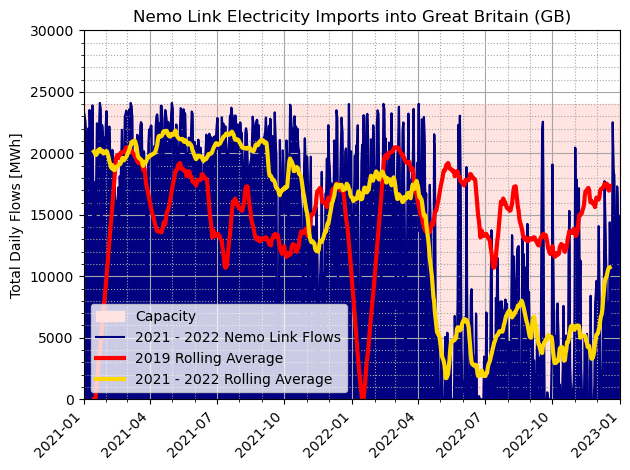

In [9]:
GBNFl = pd.concat([GBNFl2021["IFA 1 [MWh]"], GBNFl2022["IFA 1 [MWh]"]], ignore_index=True).to_frame("IFA 1 [MWh]")
GBNFl["Moyle [MWh]"] = pd.concat([GBNFl2021["Moyle [MWh]"], GBNFl2022["Moyle [MWh]"]], ignore_index=True).to_frame("Moyle [MWh]")
GBNFl["BritNed [MWh]"] = pd.concat([GBNFl2021["BritNed [MWh]"], GBNFl2022["BritNed [MWh]"]], ignore_index=True).to_frame("BritNed [MWh]")
GBNFl["East-West [MWh]"] = pd.concat([GBNFl2021["East-West [MWh]"], GBNFl2022["East-West [MWh]"]], ignore_index=True).to_frame("East-West [MWh]")
GBNFl["Nemo Link [MWh]"] = pd.concat([GBNFl2021["Nemo Link [MWh]"], GBNFl2022["Nemo Link [MWh]"]], ignore_index=True).to_frame("Nemo Link [MWh]")
GBNFl["ElecLink [MWh]"] = pd.concat([GBNFl2021["ElecLink [MWh]"], GBNFl2022["ElecLink [MWh]"]], ignore_index=True).to_frame("ElecLink [MWh]")
GBNFl["IFA 2 [MWh]"] = pd.concat([GBNFl2021["IFA 2 [MWh]"], GBNFl2022["IFA 2 [MWh]"]], ignore_index=True).to_frame("IFA 2 [MWh]")
GBNFl["North Sea Link [MWh]"] = pd.concat([GBNFl2021["North Sea Link [MWh]"], GBNFl2022["North Sea Link [MWh]"]], ignore_index=True).to_frame("North Sea Link [MWh]")
GBNFl["Total [MWh]"] = (GBNFl["IFA 1 [MWh]"] + GBNFl["Moyle [MWh]"] + GBNFl["BritNed [MWh]"]
                        + GBNFl["East-West [MWh]"] + GBNFl["Nemo Link [MWh]"] + GBNFl["ElecLink [MWh]"]
                        + GBNFl["IFA 2 [MWh]"] + GBNFl["North Sea Link [MWh]"])
GBNFl["France (FR) [MWh]"] = GBNFl["IFA 1 [MWh]"] + GBNFl["ElecLink [MWh]"] + GBNFl["IFA 2 [MWh]"]
GBNFl["Ireland (SEM) [MWh]"] = GBNFl["Moyle [MWh]"] + GBNFl["East-West [MWh]"]
GBNFl["European Mainland (FR, BE, NL) [MWh]"] = (GBNFl["IFA 1 [MWh]"] + GBNFl["BritNed [MWh]"]
                        + GBNFl["Nemo Link [MWh]"] + GBNFl["ElecLink [MWh]"] + GBNFl["IFA 2 [MWh]"])

GBNFl["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "IFA 1 [MWh]", "Moyle [MWh]", "BritNed [MWh]", "East-West [MWh]",
            "Nemo Link [MWh]", "ElecLink [MWh]", "IFA 2 [MWh]", "North Sea Link [MWh]",
            "Total [MWh]", "France (FR) [MWh]", "Ireland (SEM) [MWh]", "European Mainland (FR, BE, NL) [MWh]"]

#GBNFl["IFA 1 [MWh]"] = pd.to_numeric(GBNFl["IFA 1 [MWh]"], errors='coerce')
GBNFl = pd.DataFrame(GBNFl)

#GBNFl["BZN|FR"] = GBNFl["BZN|FR"].round(2)

GBNFl = GBNFl.reindex(columns=NewOrder)


######################################################################################################################

%store -r GBNFlpc

fig, ax = plt.subplots()
#fig.set_figheight(8)
#fig.set_figwidth(10)

a = input("Choose cable: ", )

plt.title(f"{a} Electricity Imports into Great Britain (GB)")
plt.ylabel('Total Daily Flows [MWh]')

if a == "Nemo Link":
    lab1 = "2019 Rolling Average"
else:
    lab1 = "2017 - 2019 Rolling Average"

plt.fill_between(GBNFl["Date"], IntCap[f"{a} [MWh]"], color="mistyrose", label="Capacity")
plt.fill_between(GBNFl["Date"], GBNFl[f"{a} [MWh]"], color="navy")
ax.plot(GBNFl["Date"], GBNFl[f"{a} [MWh]"], color="navy", label=f"2021 - 2022 {a} Flows")
ax.plot(GBNFl["Date"], GBNFlpc[f"{a} Mean [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "red", label=f"{lab1}")
ax.plot(GBNFl["Date"], GBNFl[f"{a} [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="2021 - 2022 Rolling Average")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit:", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0,int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

## Export Data from ENTSO-E

In [10]:
import pandas as pd
import numpy as np

%store -r NSLFlows
%store -r BNDFlows
%store -r NEMFlows
%store -r ELCFlows
%store -r IF1Flows
%store -r IF2Flows
%store -r MEWFlows

In [11]:
ELC1 = pd.DataFrame({"Index": range(1,366)})
ELC1["GB - FR"] = np.NaN

ELC2 = pd.DataFrame({"Index": range(365, 731)})
ELC2["GB - FR"] = ELCFlows.iloc[:,2]

ExportData = pd.DataFrame({"North Sea Link [MWh]": NSLFlows.iloc[:,2]}).replace(np.NaN, 0)
ExportData["BritNed [MWh]"] = BNDFlows.iloc[:,2]
ExportData["Nemo Link [MWh]"] = NEMFlows.iloc[:,2]
ExportData["ElecLink [MWh]"] = pd.concat([ELC1["GB - FR"], ELC2["GB - FR"]], ignore_index=True).replace(np.NaN, 0)
ExportData["IFA 1 [MWh]"] = IF1Flows.iloc[:,2].replace(np.NaN, 0)
ExportData["IFA 2 [MWh]"] = IF2Flows.iloc[:,2].replace(np.NaN, 0)
ExportData["Ireland (SEM) [MWh]"] = MEWFlows.iloc[:,2]
ExportData["Total [MWh]"] = (ExportData["IFA 1 [MWh]"] + ExportData["BritNed [MWh]"]
                        + ExportData["Nemo Link [MWh]"] + ExportData["ElecLink [MWh]"]
                        + ExportData["IFA 2 [MWh]"] + ExportData["North Sea Link [MWh]"]
                        + ExportData["Ireland (SEM) [MWh]"])
ExportData["France (FR) [MWh]"] = ExportData["IFA 1 [MWh]"] + ExportData["ElecLink [MWh]"] + ExportData["IFA 2 [MWh]"]
ExportData["European Mainland (FR, BE, NL) [MWh]"] = (ExportData["IFA 1 [MWh]"] + ExportData["BritNed [MWh]"]
                        + ExportData["Nemo Link [MWh]"] + ExportData["ElecLink [MWh]"] + ExportData["IFA 2 [MWh]"])

ExportData["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "IFA 1 [MWh]", "BritNed [MWh]",
            "Nemo Link [MWh]", "ElecLink [MWh]", "IFA 2 [MWh]", "North Sea Link [MWh]",
            "Total [MWh]", "France (FR) [MWh]", "Ireland (SEM) [MWh]", "European Mainland (FR, BE, NL) [MWh]"]

ExportData.iloc[:,1:] = ExportData.iloc[:,1:].round(1)

ExportData = ExportData.reindex(columns=NewOrder)

u = input("Enter cable: ", )

df = pd.DataFrame()
df["Date"] = GBNFl["Date"]
df[f"{u} [MWh]"] = GBNFl[f"{u} [MWh]"]
print(df.to_string())

Enter cable: Nemo Link
          Date  Nemo Link [MWh]
0   2021-01-01          23491.0
1   2021-01-02          23078.0
2   2021-01-03          22707.0
3   2021-01-04          21418.0
4   2021-01-05          13706.0
5   2021-01-06          19307.0
6   2021-01-07          22018.0
7   2021-01-08          19414.0
8   2021-01-09          23525.0
9   2021-01-10          21551.0
10  2021-01-11          16082.0
11  2021-01-12          21147.0
12  2021-01-13          23896.0
13  2021-01-14          14720.0
14  2021-01-15          17691.0
15  2021-01-16          13728.0
16  2021-01-17          13622.0
17  2021-01-18          17991.0
18  2021-01-19          22443.0
19  2021-01-20          21997.0
20  2021-01-21          21647.0
21  2021-01-22          22382.0
22  2021-01-23          24100.0
23  2021-01-24          23542.0
24  2021-01-25          14353.0
25  2021-01-26          22309.0
26  2021-01-27          21553.0
27  2021-01-28          20409.0
28  2021-01-29          21282.0
29  2021-01-30   

In [12]:
IntCap = pd.DataFrame({"Date": pd.date_range(start="1/1/2021", periods=730, freq="D")})
IntCap["IFA 1 [MWh]"] = pd.Series([2000*24 for x in range(len(IntCap.index))])
IntCap["Moyle [MWh]"] = pd.Series([500*24 for x in range(len(IntCap.index))])
IntCap["BritNed [MWh]"] = pd.Series([1000*24 for x in range(len(IntCap.index))])
IntCap["East-West [MWh]"] = pd.Series([500*24 for x in range(len(IntCap.index))])
IntCap["Nemo Link [MWh]"] = pd.Series([1000*24 for x in range(len(IntCap.index))])
IntCap["ElecLink [MWh]"] = pd.Series([1000*24 for x in range(len(IntCap.index))])
IntCap.loc[0:508, "ElecLink [MWh]"] = 0
IntCap["IFA 2 [MWh]"] = pd.Series([1000*24 for x in range(len(IntCap.index))])
IntCap.loc[0:20, "IFA 2 [MWh]"] = 0
IntCap["North Sea Link [MWh]"] = pd.Series([1400*24 for x in range(len(IntCap.index))])
IntCap.loc[0:272, "North Sea Link [MWh]"] = 0
IntCap["Total [MWh]"] = (IntCap["IFA 1 [MWh]"] + IntCap["Moyle [MWh]"] + IntCap["BritNed [MWh]"]
                         + IntCap["East-West [MWh]"] + IntCap["Nemo Link [MWh]"] + IntCap["ElecLink [MWh]"]
                         + IntCap["IFA 2 [MWh]"] + IntCap["North Sea Link [MWh]"])
IntCap["France (FR) [MWh]"] = (IntCap["IFA 1 [MWh]"] + IntCap["ElecLink [MWh]"] + IntCap["IFA 2 [MWh]"])
IntCap["Ireland (SEM) [MWh]"] = IntCap["Moyle [MWh]"] + IntCap["East-West [MWh]"]
IntCap["European Mainland (FR, BE, NL) [MWh]"] = (IntCap["IFA 1 [MWh]"] + IntCap["BritNed [MWh]"] 
                                                  + IntCap["Nemo Link [MWh]"] + IntCap["ElecLink [MWh]"]
                                                  + IntCap["IFA 2 [MWh]"])

Choose cable: Nemo Link
(-1200.0, 25200.0)
Choose y limit:30000


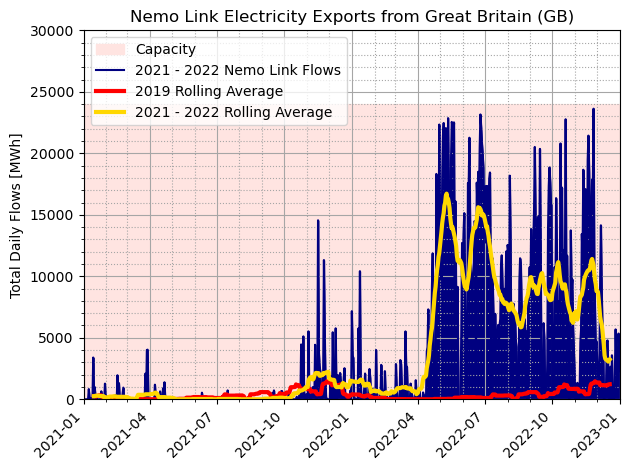

In [13]:
ELC1 = pd.DataFrame({"Index": range(1,366)})
ELC1["GB - FR"] = np.NaN

ELC2 = pd.DataFrame({"Index": range(365, 731)})
ELC2["GB - FR"] = ELCFlows.iloc[:,2]

ExportData = pd.DataFrame({"North Sea Link [MWh]": NSLFlows.iloc[:,2]}).replace(np.NaN, 0)
ExportData["BritNed [MWh]"] = BNDFlows.iloc[:,2]
ExportData["Nemo Link [MWh]"] = NEMFlows.iloc[:,2]
ExportData["ElecLink [MWh]"] = pd.concat([ELC1["GB - FR"], ELC2["GB - FR"]], ignore_index=True).replace(np.NaN, 0)
ExportData["IFA 1 [MWh]"] = IF1Flows.iloc[:,2].replace(np.NaN, 0)
ExportData["IFA 2 [MWh]"] = IF2Flows.iloc[:,2].replace(np.NaN, 0)
ExportData["Ireland (SEM) [MWh]"] = MEWFlows.iloc[:,2]
ExportData["Total [MWh]"] = (ExportData["IFA 1 [MWh]"] + ExportData["BritNed [MWh]"]
                        + ExportData["Nemo Link [MWh]"] + ExportData["ElecLink [MWh]"]
                        + ExportData["IFA 2 [MWh]"] + ExportData["North Sea Link [MWh]"]
                        + ExportData["Ireland (SEM) [MWh]"])
ExportData["France (FR) [MWh]"] = ExportData["IFA 1 [MWh]"] + ExportData["ElecLink [MWh]"] + ExportData["IFA 2 [MWh]"]
ExportData["European Mainland (FR, BE, NL) [MWh]"] = (ExportData["IFA 1 [MWh]"] + ExportData["BritNed [MWh]"]
                        + ExportData["Nemo Link [MWh]"] + ExportData["ElecLink [MWh]"] + ExportData["IFA 2 [MWh]"])

ExportData["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "IFA 1 [MWh]", "BritNed [MWh]",
            "Nemo Link [MWh]", "ElecLink [MWh]", "IFA 2 [MWh]", "North Sea Link [MWh]",
            "Total [MWh]", "France (FR) [MWh]", "Ireland (SEM) [MWh]", "European Mainland (FR, BE, NL) [MWh]"]

ExportData.iloc[:,1:] = ExportData.iloc[:,1:].round(1)


######################################################################################################################

%store -r GBOutNFlpc

fig, ax = plt.subplots()
#fig.set_figheight(8)
#fig.set_figwidth(10)

a = input("Choose cable: ", )

plt.title(f"{a} Electricity Exports from Great Britain (GB)")
plt.ylabel('Total Daily Flows [MWh]')

if a == "Nemo Link":
    lab1 = "2019 Rolling Average"
else:
    lab1 = "2017 - 2019 Rolling Average"

plt.fill_between(ExportData["Date"], IntCap[f"{a} [MWh]"], color="mistyrose", label="Capacity")
plt.fill_between(ExportData["Date"], ExportData[f"{a} [MWh]"], color="navy")
ax.plot(ExportData["Date"], ExportData[f"{a} [MWh]"], color="navy", label=f"2021 - 2022 {a} Flows")
ax.plot(ExportData["Date"], GBOutNFlpc[f"{a} Mean [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "red", label=f"{lab1}")
ax.plot(ExportData["Date"], ExportData[f"{a} [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="2021 - 2022 Rolling Average")

plt.legend(loc="upper left")
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit:", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0,int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

## Import and Export

Choose cable: Nemo Link
(-26.405, 26.505000000000003)
Choose y limit:30


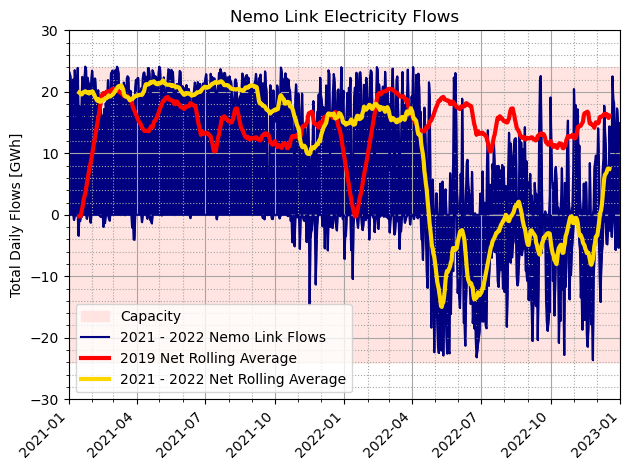

          Date    Mainland
0   2021-01-01         NaN
1   2021-01-02         NaN
2   2021-01-03         NaN
3   2021-01-04         NaN
4   2021-01-05         NaN
5   2021-01-06         NaN
6   2021-01-07         NaN
7   2021-01-08         NaN
8   2021-01-09         NaN
9   2021-01-10         NaN
10  2021-01-11         NaN
11  2021-01-12         NaN
12  2021-01-13         NaN
13  2021-01-14         NaN
14  2021-01-15   63.100782
15  2021-01-16   63.187389
16  2021-01-17   63.121389
17  2021-01-18   63.950889
18  2021-01-19   65.427175
19  2021-01-20   66.202496
20  2021-01-21   66.809104
21  2021-01-22   68.234782
22  2021-01-23   69.853800
23  2021-01-24   70.293086
24  2021-01-25   70.263479
25  2021-01-26   71.867389
26  2021-01-27   72.615425
27  2021-01-28   73.206175
28  2021-01-29   74.028414
29  2021-01-30   73.897789
30  2021-01-31   74.739968
31  2021-02-01   75.563039
32  2021-02-02   77.353818
33  2021-02-03   77.530854
34  2021-02-04   77.757746
35  2021-02-05   77.219961
3

In [14]:
GBNFl = pd.concat([GBNFl2021["IFA 1 [MWh]"], GBNFl2022["IFA 1 [MWh]"]], ignore_index=True).to_frame("IFA 1 [MWh]")
GBNFl["Moyle [MWh]"] = pd.concat([GBNFl2021["Moyle [MWh]"], GBNFl2022["Moyle [MWh]"]], ignore_index=True).to_frame("Moyle [MWh]")
GBNFl["BritNed [MWh]"] = pd.concat([GBNFl2021["BritNed [MWh]"], GBNFl2022["BritNed [MWh]"]], ignore_index=True).to_frame("BritNed [MWh]")
GBNFl["East-West [MWh]"] = pd.concat([GBNFl2021["East-West [MWh]"], GBNFl2022["East-West [MWh]"]], ignore_index=True).to_frame("East-West [MWh]")
GBNFl["Nemo Link [MWh]"] = pd.concat([GBNFl2021["Nemo Link [MWh]"], GBNFl2022["Nemo Link [MWh]"]], ignore_index=True).to_frame("Nemo Link [MWh]")
GBNFl["ElecLink [MWh]"] = pd.concat([GBNFl2021["ElecLink [MWh]"], GBNFl2022["ElecLink [MWh]"]], ignore_index=True).to_frame("ElecLink [MWh]")
GBNFl["IFA 2 [MWh]"] = pd.concat([GBNFl2021["IFA 2 [MWh]"], GBNFl2022["IFA 2 [MWh]"]], ignore_index=True).to_frame("IFA 2 [MWh]")
GBNFl["North Sea Link [MWh]"] = pd.concat([GBNFl2021["North Sea Link [MWh]"], GBNFl2022["North Sea Link [MWh]"]], ignore_index=True).to_frame("North Sea Link [MWh]")
GBNFl["Total [MWh]"] = (GBNFl["IFA 1 [MWh]"] + GBNFl["Moyle [MWh]"] + GBNFl["BritNed [MWh]"]
                        + GBNFl["East-West [MWh]"] + GBNFl["Nemo Link [MWh]"] + GBNFl["ElecLink [MWh]"]
                        + GBNFl["IFA 2 [MWh]"] + GBNFl["North Sea Link [MWh]"])
GBNFl["France (FR) [MWh]"] = GBNFl["IFA 1 [MWh]"] + GBNFl["ElecLink [MWh]"] + GBNFl["IFA 2 [MWh]"]
GBNFl["Ireland (SEM) [MWh]"] = GBNFl["Moyle [MWh]"] + GBNFl["East-West [MWh]"]
GBNFl["European Mainland (FR, BE, NL) [MWh]"] = (GBNFl["IFA 1 [MWh]"] + GBNFl["BritNed [MWh]"]
                        + GBNFl["Nemo Link [MWh]"] + GBNFl["ElecLink [MWh]"] + GBNFl["IFA 2 [MWh]"])

GBNFl["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "IFA 1 [MWh]", "Moyle [MWh]", "BritNed [MWh]", "East-West [MWh]",
            "Nemo Link [MWh]", "ElecLink [MWh]", "IFA 2 [MWh]", "North Sea Link [MWh]",
            "Total [MWh]", "France (FR) [MWh]", "Ireland (SEM) [MWh]", "European Mainland (FR, BE, NL) [MWh]"]

#GBNFl["IFA 1 [MWh]"] = pd.to_numeric(GBNFl["IFA 1 [MWh]"], errors='coerce')
GBNFl = pd.DataFrame(GBNFl)

#GBNFl["BZN|FR"] = GBNFl["BZN|FR"].round(2)

GBNFl = GBNFl.replace(np.NaN, 0)

GBNFl = GBNFl.reindex(columns=NewOrder)


######################################################################################################################

ELC1 = pd.DataFrame({"Index": range(1,366)})
ELC1["GB - FR"] = np.NaN

ELC2 = pd.DataFrame({"Index": range(365, 731)})
ELC2["GB - FR"] = ELCFlows.iloc[:,2]

ExportData = pd.DataFrame({"North Sea Link [MWh]": NSLFlows.iloc[:,2]}).replace(np.NaN, 0)
ExportData["BritNed [MWh]"] = BNDFlows.iloc[:,2]
ExportData["Nemo Link [MWh]"] = NEMFlows.iloc[:,2]
ExportData["ElecLink [MWh]"] = pd.concat([ELC1["GB - FR"], ELC2["GB - FR"]], ignore_index=True).replace(np.NaN, 0)
ExportData["IFA 1 [MWh]"] = IF1Flows.iloc[:,2].replace(np.NaN, 0)
ExportData["IFA 2 [MWh]"] = IF2Flows.iloc[:,2].replace(np.NaN, 0)
ExportData["Ireland (SEM) [MWh]"] = MEWFlows.iloc[:,2]
ExportData["Total [MWh]"] = (ExportData["IFA 1 [MWh]"] + ExportData["BritNed [MWh]"]
                        + ExportData["Nemo Link [MWh]"] + ExportData["ElecLink [MWh]"]
                        + ExportData["IFA 2 [MWh]"] + ExportData["North Sea Link [MWh]"]
                        + ExportData["Ireland (SEM) [MWh]"])
ExportData["France (FR) [MWh]"] = ExportData["IFA 1 [MWh]"] + ExportData["ElecLink [MWh]"] + ExportData["IFA 2 [MWh]"]
ExportData["European Mainland (FR, BE, NL) [MWh]"] = (ExportData["IFA 1 [MWh]"] + ExportData["BritNed [MWh]"]
                        + ExportData["Nemo Link [MWh]"] + ExportData["ElecLink [MWh]"] + ExportData["IFA 2 [MWh]"])

ExportData["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "IFA 1 [MWh]", "BritNed [MWh]",
            "Nemo Link [MWh]", "ElecLink [MWh]", "IFA 2 [MWh]", "North Sea Link [MWh]",
            "Total [MWh]", "France (FR) [MWh]", "Ireland (SEM) [MWh]", "European Mainland (FR, BE, NL) [MWh]"]

ExportData.iloc[:,1:] = ExportData.iloc[:,1:].round(1)

######################################################################################################################

%store -r GBOutNFlpc
%store -r GBNFlpc

fig, ax = plt.subplots()
#fig.set_figheight(8)
#fig.set_figwidth(10)

a = input("Choose cable: ", )

plt.title(f"{a} Electricity Flows")
plt.ylabel('Total Daily Flows [GWh]')

if a == "Nemo Link":
    lab1 = "2019 Net Rolling Average"
else:
    lab1 = "2017 - 2019 Net Rolling Average"

plt.fill_between(GBNFl["Date"], IntCap[f"{a} [MWh]"]/1000, color="mistyrose", label="Capacity")
plt.fill_between(GBNFl["Date"], GBNFl[f"{a} [MWh]"]/1000, color="navy")
plt.fill_between(GBNFl["Date"], -IntCap[f"{a} [MWh]"]/1000, color="mistyrose")
plt.fill_between(GBNFl["Date"], -ExportData[f"{a} [MWh]"]/1000, color="navy")
ax.plot(GBNFl["Date"], GBNFl[f"{a} [MWh]"]/1000, color="navy", label=f"2021 - 2022 {a} Flows")
ax.plot(GBNFl["Date"], -ExportData[f"{a} [MWh]"]/1000, color="navy")
ax.plot(ExportData["Date"], (GBNFlpc[f"{a} Mean [MWh]"]/1000-GBOutNFlpc[f"{a} Mean [MWh]"]/1000).rolling(28,  center=True).mean(), linewidth = 3, color = "red", label=f"{lab1}")
ax.plot(GBNFl["Date"], (GBNFl[f"{a} [MWh]"]/1000-ExportData[f"{a} [MWh]"]/1000).rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="2021 - 2022 Net Rolling Average")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit:", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(-int(b),int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

DFu = pd.DataFrame()
DFu["Date"] = GBNFl["Date"]
DFu["Mainland"] = ((GBNFl["European Mainland (FR, BE, NL) [MWh]"]-ExportData["European Mainland (FR, BE, NL) [MWh]"])/1000).rolling(28,  center=True).mean()

print(DFu.to_string())

## Capacity Factor Calculations

In [15]:
%store -r use_for_avg

Avg = pd.DataFrame()
Avg["Year"] = [2017, 2018, 2019, 2021, 2022]

Avg.loc[0, "Total"] = round(np.nanmean(use_for_avg.loc[0:365, "Total [MWh]"])/24,1)
Avg.loc[1, "Total"] = round(np.nanmean(use_for_avg.loc[365:730, "Total [MWh]"])/24,1)
Avg.loc[2, "Total"] = round(np.nanmean(use_for_avg.loc[730:1095, "Total [MWh]"])/24,1)
Avg.loc[3, "Total"] = round(np.nanmean(GBNFl.loc[0:365, "Total [MWh]"])/24,1)
Avg.loc[4, "Total"] = round(np.nanmean(GBNFl.loc[365:730, "Total [MWh]"])/24,1)

Avg.loc[0, "IE"] = round(np.nanmean(use_for_avg.loc[0:365, "Ireland (SEM) [MWh]"])/24,1)
Avg.loc[1, "IE"] = round(np.nanmean(use_for_avg.loc[365:730, "Ireland (SEM) [MWh]"])/24,1)
Avg.loc[2, "IE"] = round(np.nanmean(use_for_avg.loc[730:1095, "Ireland (SEM) [MWh]"])/24,1)
Avg.loc[3, "IE"] = round(np.nanmean(GBNFl.loc[0:365, "Ireland (SEM) [MWh]"])/24,1)
Avg.loc[4, "IE"] = round(np.nanmean(GBNFl.loc[365:730, "Ireland (SEM) [MWh]"])/24,1)

Avg.loc[0, "FR"] = round(np.nanmean(use_for_avg.loc[0:365, "France (FR) [MWh]"])/24,1)
Avg.loc[1, "FR"] = round(np.nanmean(use_for_avg.loc[365:730, "France (FR) [MWh]"])/24,1)
Avg.loc[2, "FR"] = round(np.nanmean(use_for_avg.loc[730:1095, "France (FR) [MWh]"])/24,1)
Avg.loc[3, "FR"] = round(np.nanmean(GBNFl.loc[0:365, "France (FR) [MWh]"])/24,1)
Avg.loc[4, "FR"] = round(np.nanmean(GBNFl.loc[365:730, "France (FR) [MWh]"])/24,1)

Avg.loc[0, "EU"] = round(np.nanmean(use_for_avg.loc[0:365, "European Mainland (FR, BE, NL) [MWh]"])/24,1)
Avg.loc[1, "EU"] = round(np.nanmean(use_for_avg.loc[365:730, "European Mainland (FR, BE, NL) [MWh]"])/24,1)
Avg.loc[2, "EU"] = round(np.nanmean(use_for_avg.loc[730:1095, "European Mainland (FR, BE, NL) [MWh]"])/24,1)
Avg.loc[3, "EU"] = round(np.nanmean(GBNFl.loc[0:365, "European Mainland (FR, BE, NL) [MWh]"])/24,1)
Avg.loc[4, "EU"] = round(np.nanmean(GBNFl.loc[365:730, "European Mainland (FR, BE, NL) [MWh]"])/24,1)

Avg.loc[3, "NSL"] = round(np.nanmean(GBNFl.loc[272:365, "North Sea Link [MWh]"])/24,1)
Avg.loc[4, "NSL"] = round(np.nanmean(GBNFl.loc[365:730, "North Sea Link [MWh]"])/24,1)

Avg.loc[0, "BritNed"] = round(np.nanmean(use_for_avg.loc[0:365, "BritNed [MWh]"])/24,1)
Avg.loc[1, "BritNed"] = round(np.nanmean(use_for_avg.loc[365:730, "BritNed [MWh]"])/24,1)
Avg.loc[2, "BritNed"] = round(np.nanmean(use_for_avg.loc[730:1095, "BritNed [MWh]"])/24,1)
Avg.loc[3, "BritNed"] = round(np.nanmean(GBNFl.loc[0:365, "BritNed [MWh]"])/24,1)
Avg.loc[4, "BritNed"] = round(np.nanmean(GBNFl.loc[365:730, "BritNed [MWh]"])/24,1)

Avg.loc[2, "Nemo Link"] = round(np.nanmean(use_for_avg.loc[759:1095, "Nemo Link [MWh]"])/24,1)
Avg.loc[3, "Nemo Link"] = round(np.nanmean(GBNFl.loc[0:365, "Nemo Link [MWh]"])/24,1)
Avg.loc[4, "Nemo Link"] = round(np.nanmean(GBNFl.loc[365:730, "Nemo Link [MWh]"])/24,1)

Avg.loc[4, "ElecLink"] = round(np.nanmean(GBNFl.loc[508:730, "ElecLink [MWh]"])/24,1)

Avg.loc[0, "IFA 1"] = round(np.nanmean(use_for_avg.loc[0:365, "IFA 1 [MWh]"])/24,1)
Avg.loc[1, "IFA 1"] = round(np.nanmean(use_for_avg.loc[365:730, "IFA 1 [MWh]"])/24,1)
Avg.loc[2, "IFA 1"] = round(np.nanmean(use_for_avg.loc[730:1095, "IFA 1 [MWh]"])/24,1)
Avg.loc[3, "IFA 1"] = round(np.nanmean(GBNFl.loc[0:365, "IFA 1 [MWh]"])/24,1)
Avg.loc[4, "IFA 1"] = round(np.nanmean(GBNFl.loc[365:730, "IFA 1 [MWh]"])/24,1)

Avg.loc[3, "IFA 2"] = round(np.nanmean(GBNFl.loc[20:365, "IFA 2 [MWh]"])/24,1)
Avg.loc[4, "IFA 2"] = round(np.nanmean(GBNFl.loc[365:730, "IFA 2 [MWh]"])/24,1)

Avg.loc[0, "East-West"] = round(np.nanmean(use_for_avg.loc[0:365, "East-West [MWh]"])/24,1)
Avg.loc[1, "East-West"] = round(np.nanmean(use_for_avg.loc[365:730, "East-West [MWh]"])/24,1)
Avg.loc[2, "East-West"] = round(np.nanmean(use_for_avg.loc[730:1095, "East-West [MWh]"])/24,1)
Avg.loc[3, "East-West"] = round(np.nanmean(GBNFl.loc[0:365, "East-West [MWh]"])/24,1)
Avg.loc[4, "East-West"] = round(np.nanmean(GBNFl.loc[365:730, "East-West [MWh]"])/24,1)

Avg.loc[0, "Moyle"] = round(np.nanmean(use_for_avg.loc[0:365, "Moyle [MWh]"])/24,1)
Avg.loc[1, "Moyle"] = round(np.nanmean(use_for_avg.loc[365:730, "Moyle [MWh]"])/24,1)
Avg.loc[2, "Moyle"] = round(np.nanmean(use_for_avg.loc[730:1095, "Moyle [MWh]"])/24,1)
Avg.loc[3, "Moyle"] = round(np.nanmean(GBNFl.loc[0:365, "Moyle [MWh]"])/24,1)
Avg.loc[4, "Moyle"] = round(np.nanmean(GBNFl.loc[365:730, "Moyle [MWh]"])/24,1)

# For average flows per hour
Avg

Year   Total     IE      FR      EU    NSL  BritNed  Nemo Link  ElecLink  \
0  2017  2218.3  264.9  1149.2  1953.3    NaN    804.2        NaN       NaN   
1  2018  2503.2  214.9  1516.3  2288.3    NaN    772.0        NaN       NaN   
2  2019  2855.2  198.0  1356.3  2657.2    NaN    691.1      662.4       NaN   
3  2021  3331.3  149.8  1723.1  3015.0  618.9    494.5      797.4       NaN   
4  2022  1852.9  236.0   317.1  1097.9  519.0    412.1      368.7      70.3   

    IFA 1  IFA 2  East-West  Moyle  
0  1149.2    NaN      163.0  101.9  
1  1516.3    NaN      145.4   69.4  
2  1356.3    NaN      141.3   56.7  
3  1153.9  600.6       61.5   88.3  
4   126.6  141.3      113.2  122.8

In [16]:
# For capacity factor

%store -r use_for_avg

Cpfc = pd.DataFrame()
Cpfc["Year"] = [2017, 2018, 2019, 2021, 2022]

Cpfc.loc[0, "Total"] = round(sum(use_for_avg.loc[0:365, "Total [MWh]"])/(4000*24*365),4)
Cpfc.loc[1, "Total"] = round(sum(use_for_avg.loc[365:730, "Total [MWh]"])/(4000*24*365),4)
Cpfc.loc[2, "Total"] = round(sum(use_for_avg.loc[730:1095, "Total [MWh]"])/(4920.5479*24*365),4)
Cpfc.loc[3, "Total"] = round(sum(GBNFl.loc[0:365, "Total [MWh]"])/(6301.9178*24*365),4)
Cpfc.loc[4, "Total"] = round(sum(GBNFl.loc[365:730, "Total [MWh]"])/(8008.2192*24*365),4)

Cpfc.loc[0, "IE"] = round(sum(use_for_avg.loc[0:365, "Ireland (SEM) [MWh]"])/(1000*24*365),4)
Cpfc.loc[1, "IE"] = round(sum(use_for_avg.loc[365:730, "Ireland (SEM) [MWh]"])/(1000*24*365),4)
Cpfc.loc[2, "IE"] = round(sum(use_for_avg.loc[730:1095, "Ireland (SEM) [MWh]"])/(1000*24*365),4)
Cpfc.loc[3, "IE"] = round(sum(GBNFl.loc[0:365, "Ireland (SEM) [MWh]"])/(1000*24*365),4)
Cpfc.loc[4, "IE"] = round(sum(GBNFl.loc[365:730, "Ireland (SEM) [MWh]"])/(1000*24*365),4)

Cpfc.loc[0, "FR"] = round(sum(use_for_avg.loc[0:365, "France (FR) [MWh]"])/(2000*24*365),4)
Cpfc.loc[1, "FR"] = round(sum(use_for_avg.loc[365:730, "France (FR) [MWh]"])/(2000*24*365),4)
Cpfc.loc[2, "FR"] = round(sum(use_for_avg.loc[730:1095, "France (FR) [MWh]"])/(2000*24*365),4)
Cpfc.loc[3, "FR"] = round(sum(GBNFl.loc[0:365, "France (FR) [MWh]"])/(2945.2055*24*365),4)
Cpfc.loc[4, "FR"] = round(sum(GBNFl.loc[365:730, "France (FR) [MWh]"])/(3608.2192*24*365),4)

Cpfc.loc[0, "EU"] = round(sum(use_for_avg.loc[0:365, "European Mainland (FR, BE, NL) [MWh]"])/(3000*24*365),4)
Cpfc.loc[1, "EU"] = round(sum(use_for_avg.loc[365:730, "European Mainland (FR, BE, NL) [MWh]"])/(3000*24*365),4)
Cpfc.loc[2, "EU"] = round(sum(use_for_avg.loc[730:1095, "European Mainland (FR, BE, NL) [MWh]"])/(3920.5479*24*365),4)
Cpfc.loc[3, "EU"] = round(sum(GBNFl.loc[0:365, "European Mainland (FR, BE, NL) [MWh]"])/(4945.2055*24*365),4)
Cpfc.loc[4, "EU"] = round(sum(GBNFl.loc[365:730, "European Mainland (FR, BE, NL) [MWh]"])/(5608.2192*24*365),4)

Cpfc.loc[3, "NSL"] = round(sum(GBNFl.loc[272:365, "North Sea Link [MWh]"])/(356.7123*24*365),4)
Cpfc.loc[4, "NSL"] = round(sum(GBNFl.loc[365:730, "North Sea Link [MWh]"])/(1400*24*365),4)

Cpfc.loc[0, "BritNed"] = round(sum(use_for_avg.loc[0:365, "BritNed [MWh]"])/(1000*24*365),4)
Cpfc.loc[1, "BritNed"] = round(sum(use_for_avg.loc[365:730, "BritNed [MWh]"])/(1000*24*365),4)
Cpfc.loc[2, "BritNed"] = round(sum(use_for_avg.loc[730:1095, "BritNed [MWh]"])/(1000*24*365),4)
Cpfc.loc[3, "BritNed"] = round(sum(GBNFl.loc[0:365, "BritNed [MWh]"])/(1000*24*365),4)
Cpfc.loc[4, "BritNed"] = round(sum(GBNFl.loc[365:730, "BritNed [MWh]"])/(1000*24*365),4)

Cpfc.loc[2, "Nemo Link"] = round(sum(use_for_avg.loc[759:1095, "Nemo Link [MWh]"])/(920.5479*24*365),4)
Cpfc.loc[3, "Nemo Link"] = round(sum(GBNFl.loc[0:365, "Nemo Link [MWh]"])/(1000*24*365),4)
Cpfc.loc[4, "Nemo Link"] = round(sum(GBNFl.loc[365:730, "Nemo Link [MWh]"])/(1000*24*365),4)

Cpfc.loc[4, "ElecLink"] = round(sum(GBNFl.loc[508:730, "ElecLink [MWh]"])/(608.2192*24*365),4)

Cpfc.loc[0, "IFA 1"] = round(sum(use_for_avg.loc[0:365, "IFA 1 [MWh]"])/(2000*24*365),4)
Cpfc.loc[1, "IFA 1"] = round(sum(use_for_avg.loc[365:730, "IFA 1 [MWh]"])/(2000*24*365),4)
Cpfc.loc[2, "IFA 1"] = round(sum(use_for_avg.loc[730:1095, "IFA 1 [MWh]"])/(2000*24*365),4)
Cpfc.loc[3, "IFA 1"] = round(sum(GBNFl.loc[0:365, "IFA 1 [MWh]"])/(2000*24*365),4)
Cpfc.loc[4, "IFA 1"] = round(sum(GBNFl.loc[365:730, "IFA 1 [MWh]"])/(2000*24*365),4)

Cpfc.loc[3, "IFA 2"] = round(sum(GBNFl.loc[20:365, "IFA 2 [MWh]"])/(945.2055*24*365),4)
Cpfc.loc[4, "IFA 2"] = round(sum(GBNFl.loc[365:730, "IFA 2 [MWh]"])/(1000*24*365),4)

Cpfc.loc[0, "East-West"] = round(sum(use_for_avg.loc[0:365, "East-West [MWh]"])/(500*24*365),4)
Cpfc.loc[1, "East-West"] = round(sum(use_for_avg.loc[365:730, "East-West [MWh]"])/(500*24*365),4)
Cpfc.loc[2, "East-West"] = round(sum(use_for_avg.loc[730:1095, "East-West [MWh]"])/(500*24*365),4)
Cpfc.loc[3, "East-West"] = round(sum(GBNFl.loc[0:365, "East-West [MWh]"])/(500*24*365),4)
Cpfc.loc[4, "East-West"] = round(sum(GBNFl.loc[365:730, "East-West [MWh]"])/(500*24*365),4)

Cpfc.loc[0, "Moyle"] = round(sum(use_for_avg.loc[0:365, "Moyle [MWh]"])/(500*24*365),4)
Cpfc.loc[1, "Moyle"] = round(sum(use_for_avg.loc[365:730, "Moyle [MWh]"])/(500*24*365),4)
Cpfc.loc[2, "Moyle"] = round(sum(use_for_avg.loc[730:1095, "Moyle [MWh]"])/(500*24*365),4)
Cpfc.loc[3, "Moyle"] = round(sum(GBNFl.loc[0:365, "Moyle [MWh]"])/(500*24*365),4)
Cpfc.loc[4, "Moyle"] = round(sum(GBNFl.loc[365:730, "Moyle [MWh]"])/(500*24*365),4)

Cpfc
#Cpfc.to_csv("Cpfc.csv")


Year   Total      IE      FR      EU     NSL  BritNed  Nemo Link  ElecLink  \
0  2017  0.5561  0.2657  0.5762  0.6529     NaN   0.8064        NaN       NaN   
1  2018  0.6275  0.2154  0.7602  0.7649     NaN   0.7741        NaN       NaN   
2  2019  0.5803  0.1980  0.6781  0.6778     NaN   0.6911     0.6624       NaN   
3  2021  0.5301  0.1502  0.5867  0.6113  0.4468   0.4959     0.7995       NaN   
4  2022  0.2314  0.2360  0.0879  0.1958  0.3707   0.4121     0.3687    0.0703   

    IFA 1   IFA 2  East-West   Moyle  
0  0.5762     NaN     0.3269  0.2044  
1  0.7602     NaN     0.2917  0.1392  
2  0.6781     NaN     0.2826  0.1134  
3  0.5785  0.6024     0.1234  0.1770  
4  0.0633  0.1413     0.2263  0.2457

In [17]:
%store -r ExportData

#ExportData = ExportData.replace(np.NaN, 0)

print(ExportData.to_string())

          Date  North Sea Link   BritNed  Nemo Link  ElecLink           IFA         IFA 2  Moyle and East-West  Total Exports
0   2021-01-01             0.0      0.00       0.00       0.0      0.000000      0.000000            63.000000      63.000000
1   2021-01-02             0.0      4.00       0.00       0.0      0.000000      0.000000          1263.000000    1267.000000
2   2021-01-03             0.0      3.00       0.00       0.0      0.000000      0.000000          2940.000000    2943.000000
3   2021-01-04             0.0      0.00       0.00       0.0      0.000000      0.000000          6429.000000    6429.000000
4   2021-01-05             0.0      2.00       0.00       0.0      0.000000      0.000000          9081.000000    9083.000000
5   2021-01-06             0.0      0.00       0.00       0.0      0.000000      0.000000          2804.000000    2804.000000
6   2021-01-07             0.0      0.00       0.00       0.0      0.000000      0.000000          2152.000000    2152

In [18]:
%store -r use_for_avg
%store -r NFlOut
%store -r ExportData

#ExportData = ExportData.replace(np.NaN, 0)

SumTot = pd.DataFrame()
SumTot["Year"] = [2017, 2018, 2019, 2021, 2022]



SumTot.loc[0, "Total"] = round(sum(use_for_avg.loc[0:365, "Total [MWh]"])
                               + sum(NFlOut.loc[0:365, "Total [MWh]"]), 1)                 
SumTot.loc[1, "Total"] = round(sum(use_for_avg.loc[365:730, "Total [MWh]"])
                               + sum(NFlOut.loc[365:730, "Total [MWh]"]), 1)
SumTot.loc[2, "Total"] = round(sum(use_for_avg.loc[730:1095, "Total [MWh]"])
                               + sum(NFlOut.loc[730:1095, "Total [MWh]"]), 1)
SumTot.loc[3, "Total"] = round(sum(GBNFl.loc[0:365, "Total [MWh]"])
                               + sum(ExportData.loc[0:365, "Total Exports"]),1)
SumTot.loc[4, "Total"] = round(sum(GBNFl.loc[365:730, "Total [MWh]"])
                               + sum(ExportData.loc[365:730, "Total Exports"]),1)

SumTot.loc[0, "IE"] = round(sum(use_for_avg.loc[0:365, "Ireland (SEM) [MWh]"])
                            + sum(NFlOut.loc[0:365, "Moyle + East-West [MWh]"]), 1)                 
SumTot.loc[1, "IE"] = round(sum(use_for_avg.loc[365:730, "Ireland (SEM) [MWh]"])
                            + sum(NFlOut.loc[365:730, "Moyle + East-West [MWh]"]), 1)
SumTot.loc[2, "IE"] = round(sum(use_for_avg.loc[730:1095, "Ireland (SEM) [MWh]"])
                            + sum(NFlOut.loc[730:1095, "Moyle + East-West [MWh]"]), 1)
SumTot.loc[3, "IE"] = round(sum(GBNFl.loc[0:365, "Ireland (SEM) [MWh]"])
                            + sum(ExportData.loc[0:365, "Moyle and East-West"]),1)
SumTot.loc[4, "IE"] = round(sum(GBNFl.loc[365:730, "Ireland (SEM) [MWh]"])
                            + sum(ExportData.loc[365:730, "Moyle and East-West"]),1)

SumTot.loc[0, "FR"] = round(sum(use_for_avg.loc[0:365, "France (FR) [MWh]"])
                            + sum(NFlOut.loc[0:365, "IFA 1 [MWh]"]), 1)                 
SumTot.loc[1, "FR"] = round(sum(use_for_avg.loc[365:730, "France (FR) [MWh]"])
                            + sum(NFlOut.loc[365:730, "IFA 1 [MWh]"]), 1)
SumTot.loc[2, "FR"] = round(sum(use_for_avg.loc[730:1095, "France (FR) [MWh]"])
                            + sum(NFlOut.loc[730:1095, "IFA 1 [MWh]"]), 1)
SumTot.loc[3, "FR"] = round(sum(GBNFl.loc[0:365, "France (FR) [MWh]"])
                            + sum(ExportData.loc[0:365, "IFA"] + ExportData.loc[0:365, "IFA 2"]),1)
SumTot.loc[4, "FR"] = round(sum(GBNFl.loc[365:730, "France (FR) [MWh]"])
                            + sum(ExportData.loc[365:730, "IFA"] + ExportData.loc[365:730, "IFA 2"]
                                  +  ExportData.loc[365:730, "ElecLink"]),1)

SumTot.loc[0, "EU"] = round(sum(use_for_avg.loc[0:365, "European Mainland (FR, BE, NL) [MWh]"])
                            + sum(NFlOut.loc[0:365, "European Mainland [MWh]"]), 1)                 
SumTot.loc[1, "EU"] = round(sum(use_for_avg.loc[365:730, "European Mainland (FR, BE, NL) [MWh]"])
                            + sum(NFlOut.loc[365:730, "European Mainland [MWh]"]), 1)
SumTot.loc[2, "EU"] = round(sum(use_for_avg.loc[730:1095, "European Mainland (FR, BE, NL) [MWh]"])
                            + sum(NFlOut.loc[730:1095, "European Mainland [MWh]"]), 1)
SumTot.loc[3, "EU"] = round(sum(GBNFl.loc[0:365, "European Mainland (FR, BE, NL) [MWh]"])
                            + sum(ExportData.loc[0:365, "IFA"] + ExportData.loc[0:365, "IFA 2"]
                                 + ExportData.loc[0:365, "Nemo Link"] + ExportData.loc[0:365, "BritNed"]),1)
SumTot.loc[4, "EU"] = round(sum(GBNFl.loc[365:730, "European Mainland (FR, BE, NL) [MWh]"])
                            + sum(ExportData.loc[365:730, "IFA"] + ExportData.loc[365:730, "IFA 2"]
                                  +  ExportData.loc[365:730, "ElecLink"] + ExportData.loc[365:730, "Nemo Link"]
                                  +  ExportData.loc[365:730, "BritNed"]),1)

SumTot.loc[3, "NSL"] = round(sum(GBNFl.loc[272:365, "North Sea Link [MWh]"]
                              + ExportData.loc[272:365, "North Sea Link"]),1)
SumTot.loc[4, "NSL"] = round(sum(GBNFl.loc[365:730, "North Sea Link [MWh]"]
                              + ExportData.loc[365:730, "North Sea Link"]),1)

SumTot.loc[0, "BritNed"] = round(sum(use_for_avg.loc[0:365, "BritNed [MWh]"]) 
                                 + sum(NFlOut.loc[0:365, "BritNed [MWh]"]), 1)
SumTot.loc[1, "BritNed"] = round(sum(use_for_avg.loc[365:730, "BritNed [MWh]"]) 
                                 + sum(NFlOut.loc[365:730, "BritNed [MWh]"]), 1)
SumTot.loc[2, "BritNed"] = round(sum(use_for_avg.loc[730:1095, "BritNed [MWh]"]) 
                                 + sum(NFlOut.loc[730:1095, "BritNed [MWh]"]), 1)
SumTot.loc[3, "BritNed"] = round(sum(GBNFl.loc[0:365, "BritNed [MWh]"]) 
                                 + sum(ExportData.loc[0:365, "BritNed"]), 1)
SumTot.loc[4, "BritNed"] = round(sum(GBNFl.loc[365:730, "BritNed [MWh]"]) 
                                 + sum(ExportData.loc[365:730, "BritNed"]), 1)

SumTot.loc[2, "Nemo Link"] = round(sum(use_for_avg.loc[759:1095, "Nemo Link [MWh]"]) 
                                 + sum(NFlOut.loc[759:1095, "Nemo Link [MWh]"]), 1)
SumTot.loc[3, "Nemo Link"] = round(sum(GBNFl.loc[0:365, "Nemo Link [MWh]"]) 
                                 + sum(ExportData.loc[0:365, "Nemo Link"]), 1)
SumTot.loc[4, "Nemo Link"] = round(sum(GBNFl.loc[365:730, "Nemo Link [MWh]"]) 
                                 + sum(ExportData.loc[365:730, "Nemo Link"]), 1)

SumTot.loc[4, "ElecLink"] = round(sum(GBNFl.loc[508:730, "ElecLink [MWh]"]) 
                                 + sum(ExportData.loc[508:730, "ElecLink"]), 1)

SumTot.loc[0, "IFA 1"] = round(sum(use_for_avg.loc[0:365, "IFA 1 [MWh]"]) 
                                 + sum(NFlOut.loc[0:365, "IFA 1 [MWh]"]), 1)
SumTot.loc[1, "IFA 1"] = round(sum(use_for_avg.loc[365:730, "IFA 1 [MWh]"]) 
                                 + sum(NFlOut.loc[365:730, "IFA 1 [MWh]"]), 1)
SumTot.loc[2, "IFA 1"] = round(sum(use_for_avg.loc[730:1095, "IFA 1 [MWh]"]) 
                                 + sum(NFlOut.loc[730:1095, "IFA 1 [MWh]"]), 1)
SumTot.loc[3, "IFA 1"] = round(sum(GBNFl.loc[0:365, "IFA 1 [MWh]"]) 
                                 + sum(ExportData.loc[0:365, "IFA"]), 1)
SumTot.loc[4, "IFA 1"] = round(sum(GBNFl.loc[365:730, "IFA 1 [MWh]"]) 
                                 + sum(ExportData.loc[365:730, "IFA"]), 1)

SumTot.loc[3, "IFA 2"] = round(sum(GBNFl.loc[20:365, "IFA 2 [MWh]"]) 
                                 + sum(ExportData.loc[20:365, "IFA 2"]), 1)
SumTot.loc[4, "IFA 2"] = round(sum(GBNFl.loc[365:730, "IFA 2 [MWh]"]) 
                                 + sum(ExportData.loc[365:730, "IFA 2"]), 1)



SumTot

Year       Total         IE          FR          EU        NSL    BritNed  \
0  2017  23177629.5  3648837.8  12272751.1  19528791.7        NaN  7256040.6   
1  2018  24672582.9  3986699.4  13715105.5  20685883.5        NaN  6970778.0   
2  2019  28702446.8  4244136.1  12587048.8  24458310.7        NaN  6403297.7   
3  2021  33529294.8  3966630.5  16475678.0  28051422.2  1423832.0  4428932.0   
4  2022  35325676.2  2476265.5  15123311.5  26606357.8  6243053.0  5729523.2   

   Nemo Link   ElecLink       IFA 1      IFA 2  
0        NaN        NaN  12272751.1        NaN  
1        NaN        NaN  13715105.5        NaN  
2  5460928.2        NaN  12587048.8        NaN  
3  7146812.2        NaN  10836363.0  5627100.0  
4  5753523.0  3803284.0   5060889.5  6203322.0

In [19]:
# Capacities
CapEWT = 500*24*365
CapMOY = 500*24*365
CapELC = 1000*24*365
CapIF1 = 2000*24*365
CapIF2 = 1000*24*365
CapNEM = 1000*24*365
CapBND = 1000*24*365
CapNSL = 1400*24*365

MCap = pd.DataFrame()

MCap["Year"] = [2017, 2018, 2019, 2021, 2022]

MCap.loc[0, "Total"] = round(CapEWT + CapMOY + CapIF1 + CapBND, 1)
MCap.loc[1, "Total"] = round(CapEWT + CapMOY + CapIF1 + CapBND, 1)
MCap.loc[2, "Total"] = round(CapEWT + CapMOY + CapIF1 + CapBND + CapNEM*(1095-759)/365, 1)
MCap.loc[3, "Total"] = round(CapEWT + CapMOY + CapIF1 + CapBND + CapNEM + CapIF2*(365-20)/365 + CapNSL*(365-272)/365, 1)
MCap.loc[4, "Total"] = round(CapEWT + CapMOY + CapIF1 + CapBND + CapNEM + CapIF2 + CapNSL + CapELC*(730-508)/365, 1)

MCap.loc[0, "IE"] = round(CapEWT + CapMOY, 1)
MCap.loc[1, "IE"] = round(CapEWT + CapMOY, 1)
MCap.loc[2, "IE"] = round(CapEWT + CapMOY, 1)
MCap.loc[3, "IE"] = round(CapEWT + CapMOY, 1)
MCap.loc[4, "IE"] = round(CapEWT + CapMOY, 1)

MCap.loc[0, "FR"] = round(CapIF1, 1)
MCap.loc[1, "FR"] = round(CapIF1, 1)
MCap.loc[2, "FR"] = round(CapIF1, 1)
MCap.loc[3, "FR"] = round(CapIF1 + CapIF2*(365-20)/365, 1)
MCap.loc[4, "FR"] = round(CapIF1 + CapIF2 + CapELC*(730-508)/365, 1)

MCap.loc[0, "EU"] = round(CapIF1 + CapBND, 1)
MCap.loc[1, "EU"] = round(CapIF1 + CapBND, 1)
MCap.loc[2, "EU"] = round(CapIF1 + CapBND + CapNEM*(1095-759)/365, 1)
MCap.loc[3, "EU"] = round(CapIF1 + CapBND + CapNEM + CapIF2*(365-20)/365, 1)
MCap.loc[4, "EU"] = round(CapIF1 + CapBND + CapNEM + CapIF2 + CapELC*(730-508)/365, 1)

MCap.loc[3, "NSL"] = round(CapNSL*(365-272)/365, 1)
MCap.loc[4, "NSL"] = round(CapNSL, 1)

MCap.loc[0, "BritNed"] = round(CapBND, 1)
MCap.loc[1, "BritNed"] = round(CapBND, 1)
MCap.loc[2, "BritNed"] = round(CapBND, 1)
MCap.loc[3, "BritNed"] = round(CapBND, 1)
MCap.loc[4, "BritNed"] = round(CapBND, 1)

MCap.loc[2, "Nemo Link"] = round(CapNEM*(1095-759)/365, 1)
MCap.loc[3, "Nemo Link"] = round(CapNEM, 1)
MCap.loc[4, "Nemo Link"] = round(CapNEM, 1)

MCap.loc[4, "ElecLink"] = round(CapELC*(730-508)/365, 1)

MCap.loc[0, "IFA 1"] = round(CapIF1, 1)
MCap.loc[1, "IFA 1"] = round(CapIF1, 1)
MCap.loc[2, "IFA 1"] = round(CapIF1, 1)
MCap.loc[3, "IFA 1"] = round(CapIF1, 1)
MCap.loc[4, "IFA 1"] = round(CapIF1, 1)

MCap.loc[3, "IFA 2"] = round(CapIF2*(365-20)/365, 1)
MCap.loc[4, "IFA 2"] = round(CapIF2, 1)

MCap

Year       Total         IE          FR          EU         NSL    BritNed  \
0  2017  35040000.0  8760000.0  17520000.0  26280000.0         NaN  8760000.0   
1  2018  35040000.0  8760000.0  17520000.0  26280000.0         NaN  8760000.0   
2  2019  43104000.0  8760000.0  17520000.0  34344000.0         NaN  8760000.0   
3  2021  55204800.0  8760000.0  25800000.0  43320000.0   3124800.0  8760000.0   
4  2022  70152000.0  8760000.0  31608000.0  49128000.0  12264000.0  8760000.0   

   Nemo Link   ElecLink       IFA 1      IFA 2  
0        NaN        NaN  17520000.0        NaN  
1        NaN        NaN  17520000.0        NaN  
2  8064000.0        NaN  17520000.0        NaN  
3  8760000.0        NaN  17520000.0  8280000.0  
4  8760000.0  5328000.0  17520000.0  8760000.0

In [20]:
TotCapfc = SumTot
TotCapfc.iloc[:, 1:] = TotCapfc.iloc[:, 1:]/MCap.iloc[:, 1:]

TotCapfc.iloc[:, 1:] = TotCapfc.iloc[:, 1:].round(4)
print(TotCapfc)

#TotCapfc.to_csv("Total_capacity_factor_interconnectors.csv")

   Year   Total      IE      FR      EU     NSL  BritNed  Nemo Link  ElecLink  \
0  2017  0.6615  0.4165  0.7005  0.7431     NaN   0.8283        NaN       NaN   
1  2018  0.7041  0.4551  0.7828  0.7871     NaN   0.7958        NaN       NaN   
2  2019  0.6659  0.4845  0.7184  0.7122     NaN   0.7310     0.6772       NaN   
3  2021  0.6074  0.4528  0.6386  0.6475  0.4557   0.5056     0.8158       NaN   
4  2022  0.5036  0.2827  0.4785  0.5416  0.5091   0.6541     0.6568    0.7138   

    IFA 1   IFA 2  
0  0.7005     NaN  
1  0.7828     NaN  
2  0.7184     NaN  
3  0.6185  0.6796  
4  0.2889  0.7081  


In [21]:
PerctoGB = Cpfc.iloc[:,:11]
print(PerctoGB)

PerctoGB.iloc[:, 1:] = PerctoGB.iloc[:, 1:]/TotCapfc.iloc[:, 1:]

PerctoGB.iloc[:, 1:] = PerctoGB.iloc[:, 1:].round(4)
PerctoGB

   Year   Total      IE      FR      EU     NSL  BritNed  Nemo Link  ElecLink  \
0  2017  0.5561  0.2657  0.5762  0.6529     NaN   0.8064        NaN       NaN   
1  2018  0.6275  0.2154  0.7602  0.7649     NaN   0.7741        NaN       NaN   
2  2019  0.5803  0.1980  0.6781  0.6778     NaN   0.6911     0.6624       NaN   
3  2021  0.5301  0.1502  0.5867  0.6113  0.4468   0.4959     0.7995       NaN   
4  2022  0.2314  0.2360  0.0879  0.1958  0.3707   0.4121     0.3687    0.0703   

    IFA 1   IFA 2  
0  0.5762     NaN  
1  0.7602     NaN  
2  0.6781     NaN  
3  0.5785  0.6024  
4  0.0633  0.1413  


Year   Total      IE      FR      EU     NSL  BritNed  Nemo Link  ElecLink  \
0  2017  0.8407  0.6379  0.8226  0.8786     NaN   0.9736        NaN       NaN   
1  2018  0.8912  0.4733  0.9711  0.9718     NaN   0.9727        NaN       NaN   
2  2019  0.8715  0.4087  0.9439  0.9517     NaN   0.9454     0.9781       NaN   
3  2021  0.8727  0.3317  0.9187  0.9441  0.9805   0.9808     0.9800       NaN   
4  2022  0.4595  0.8348  0.1837  0.3615  0.7281   0.6300     0.5614    0.0985   

    IFA 1   IFA 2  
0  0.8226     NaN  
1  0.9711     NaN  
2  0.9439     NaN  
3  0.9353  0.8864  
4  0.2191  0.1995

In [22]:
PerctoGB.to_csv("Flows_to_GB_percentage.csv")

## Cable Utilization

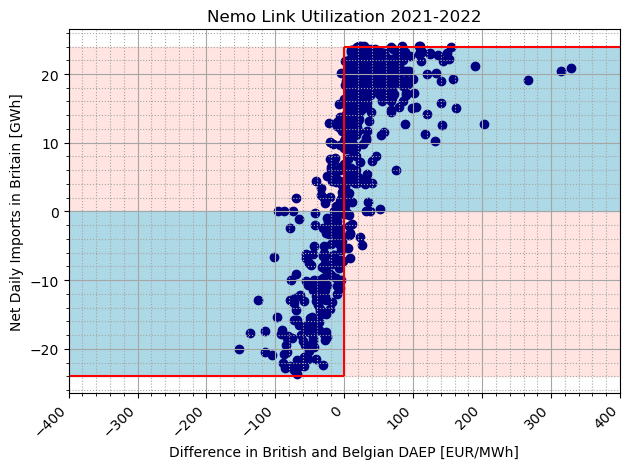

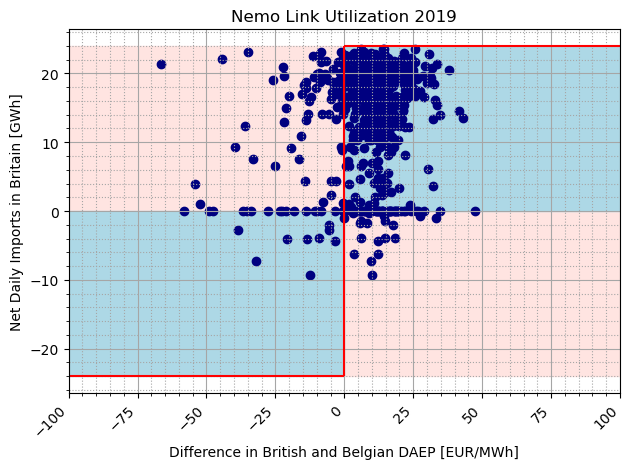

In [109]:
%store -r Comp
%store -r BZBEpc
%store -r BZGBpc
%store -r GBOutNFlpc

######################################################################################################################

GBNFl = pd.concat([GBNFl2021["IFA 1 [MWh]"], GBNFl2022["IFA 1 [MWh]"]], ignore_index=True).to_frame("IFA 1 [MWh]")
GBNFl["Moyle [MWh]"] = pd.concat([GBNFl2021["Moyle [MWh]"], GBNFl2022["Moyle [MWh]"]], ignore_index=True).to_frame("Moyle [MWh]")
GBNFl["BritNed [MWh]"] = pd.concat([GBNFl2021["BritNed [MWh]"], GBNFl2022["BritNed [MWh]"]], ignore_index=True).to_frame("BritNed [MWh]")
GBNFl["East-West [MWh]"] = pd.concat([GBNFl2021["East-West [MWh]"], GBNFl2022["East-West [MWh]"]], ignore_index=True).to_frame("East-West [MWh]")
GBNFl["Nemo Link [MWh]"] = pd.concat([GBNFl2021["Nemo Link [MWh]"], GBNFl2022["Nemo Link [MWh]"]], ignore_index=True).to_frame("Nemo Link [MWh]")
GBNFl["ElecLink [MWh]"] = pd.concat([GBNFl2021["ElecLink [MWh]"], GBNFl2022["ElecLink [MWh]"]], ignore_index=True).to_frame("ElecLink [MWh]")
GBNFl["IFA 2 [MWh]"] = pd.concat([GBNFl2021["IFA 2 [MWh]"], GBNFl2022["IFA 2 [MWh]"]], ignore_index=True).to_frame("IFA 2 [MWh]")
GBNFl["North Sea Link [MWh]"] = pd.concat([GBNFl2021["North Sea Link [MWh]"], GBNFl2022["North Sea Link [MWh]"]], ignore_index=True).to_frame("North Sea Link [MWh]")
GBNFl["Total [MWh]"] = (GBNFl["IFA 1 [MWh]"] + GBNFl["Moyle [MWh]"] + GBNFl["BritNed [MWh]"]
                        + GBNFl["East-West [MWh]"] + GBNFl["Nemo Link [MWh]"] + GBNFl["ElecLink [MWh]"]
                        + GBNFl["IFA 2 [MWh]"] + GBNFl["North Sea Link [MWh]"])
GBNFl["France (FR) [MWh]"] = GBNFl["IFA 1 [MWh]"] + GBNFl["ElecLink [MWh]"] + GBNFl["IFA 2 [MWh]"]
GBNFl["Ireland (SEM) [MWh]"] = GBNFl["Moyle [MWh]"] + GBNFl["East-West [MWh]"]
GBNFl["European Mainland (FR, BE, NL) [MWh]"] = (GBNFl["IFA 1 [MWh]"] + GBNFl["BritNed [MWh]"]
                        + GBNFl["Nemo Link [MWh]"] + GBNFl["ElecLink [MWh]"] + GBNFl["IFA 2 [MWh]"])

GBNFl["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "IFA 1 [MWh]", "Moyle [MWh]", "BritNed [MWh]", "East-West [MWh]",
            "Nemo Link [MWh]", "ElecLink [MWh]", "IFA 2 [MWh]", "North Sea Link [MWh]",
            "Total [MWh]", "France (FR) [MWh]", "Ireland (SEM) [MWh]", "European Mainland (FR, BE, NL) [MWh]"]

#GBNFl["IFA 1 [MWh]"] = pd.to_numeric(GBNFl["IFA 1 [MWh]"], errors='coerce')
GBNFl = pd.DataFrame(GBNFl)

#GBNFl["BZN|FR"] = GBNFl["BZN|FR"].round(2)

GBNFl = GBNFl.reindex(columns=NewOrder)


######################################################################################################################

ELC1 = pd.DataFrame({"Index": range(1,366)})
ELC1["GB - FR"] = np.NaN

ELC2 = pd.DataFrame({"Index": range(365, 731)})
ELC2["GB - FR"] = ELCFlows.iloc[:,2]

ExportData = pd.DataFrame({"North Sea Link [MWh]": NSLFlows.iloc[:,2]}).replace(np.NaN, 0)
ExportData["BritNed [MWh]"] = BNDFlows.iloc[:,2]
ExportData["Nemo Link [MWh]"] = NEMFlows.iloc[:,2]
ExportData["ElecLink [MWh]"] = pd.concat([ELC1["GB - FR"], ELC2["GB - FR"]], ignore_index=True).replace(np.NaN, 0)
ExportData["IFA 1 [MWh]"] = IF1Flows.iloc[:,2].replace(np.NaN, 0)
ExportData["IFA 2 [MWh]"] = IF2Flows.iloc[:,2].replace(np.NaN, 0)
ExportData["Ireland (SEM) [MWh]"] = MEWFlows.iloc[:,2]
ExportData["Total [MWh]"] = (ExportData["IFA 1 [MWh]"] + ExportData["BritNed [MWh]"]
                        + ExportData["Nemo Link [MWh]"] + ExportData["ElecLink [MWh]"]
                        + ExportData["IFA 2 [MWh]"] + ExportData["North Sea Link [MWh]"]
                        + ExportData["Ireland (SEM) [MWh]"])
ExportData["France (FR) [MWh]"] = ExportData["IFA 1 [MWh]"] + ExportData["ElecLink [MWh]"] + ExportData["IFA 2 [MWh]"]
ExportData["European Mainland (FR, BE, NL) [MWh]"] = (ExportData["IFA 1 [MWh]"] + ExportData["BritNed [MWh]"]
                        + ExportData["Nemo Link [MWh]"] + ExportData["ElecLink [MWh]"] + ExportData["IFA 2 [MWh]"])

ExportData["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "IFA 1 [MWh]", "BritNed [MWh]",
            "Nemo Link [MWh]", "ElecLink [MWh]", "IFA 2 [MWh]", "North Sea Link [MWh]",
            "Total [MWh]", "France (FR) [MWh]", "Ireland (SEM) [MWh]", "European Mainland (FR, BE, NL) [MWh]"]

ExportData.iloc[:,1:] = ExportData.iloc[:,1:].round(1)

######################################################################################################################

CabUt = pd.DataFrame()
CabUt["Date"] = Comp["Date"]
CabUt["DAEP [EUR/MWh]"] = Comp["GB"] - Comp["BE"]
CabUt["Nemo Link"] = (GBNFl["Nemo Link [MWh]"] - ExportData["Nemo Link [MWh]"])/1000

#print(CabUt.to_string())

######################################################################################################################

from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
#fig.set_figheight(8)
#fig.set_figwidth(10)

plt.title("Nemo Link Utilization 2021-2022")
plt.ylabel('Net Daily Imports in Britain [GWh]')
plt.xlabel('Difference in British and Belgian DAEP [EUR/MWh]')

ax.add_patch(Rectangle((0, -24), 400, 24,color="mistyrose"))
ax.add_patch(Rectangle((-400, 0), 400, 24,color="mistyrose"))

ax.add_patch(Rectangle((0, 0), 400, 24,color="lightblue"))
ax.add_patch(Rectangle((-400, -24), 400, 24,color="lightblue"))

ax.scatter(CabUt["DAEP [EUR/MWh]"], CabUt["Nemo Link"], color="navy")

ax.hlines(-24, -400, 0, colors="red", linestyles='solid')
ax.hlines(24, 0, 400, colors="red", linestyles='solid')
ax.vlines(0, -24, 24, colors="red", linestyles='solid')

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

#print(ax.get_ylim())
#b = input("Choose y limit:", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(-400, 400)
#plt.ylim(-int(b),int(b))
plt.tight_layout()

plt.show()

######################################################################################################################

CabUt = pd.DataFrame()
CabUt["Date"] = pd.date_range(start="1/1/2017", periods=1095, freq="D")
CabUt["DAEP [EUR/MWh]"] = BZGBpc["BZN|GB"] - BZBEpc["BZN|BE"]
CabUt["Nemo Link PC"] = (GBNFlpc["Nemo Link Mean [MWh]"] - GBOutNFlpc["Nemo Link Mean [MWh]"])/1000

#print(CabUt.to_string())

######################################################################################################################

from matplotlib.patches import Rectangle



fig, ax = plt.subplots()
#fig.set_figheight(8)
#fig.set_figwidth(10)

plt.title("Nemo Link Utilization 2019")
plt.ylabel('Net Daily Imports in Britain [GWh]')
plt.xlabel('Difference in British and Belgian DAEP [EUR/MWh]')

ax.add_patch(Rectangle((0, -24), 400, 24,color="mistyrose"))
ax.add_patch(Rectangle((-400, 0), 400, 24,color="mistyrose"))

ax.add_patch(Rectangle((0, 0), 400, 24,color="lightblue"))
ax.add_patch(Rectangle((-400, -24), 400, 24,color="lightblue"))

ax.scatter(CabUt["DAEP [EUR/MWh]"], CabUt["Nemo Link PC"], color="navy")

ax.hlines(-24, -400, 0, colors="red", linestyles='solid')
ax.hlines(24, 0, 400, colors="red", linestyles='solid')
ax.vlines(0, -24, 24, colors="red", linestyles='solid')

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

#print(ax.get_ylim())
#b = input("Choose y limit:", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(-100, 100)
#plt.ylim(-int(b),int(b))
plt.tight_layout()

plt.show()


In [60]:
A = pd.DataFrame()
A = (Comppc.loc[729:, "GB"] - Comppc.loc[729:, "BE"])

print(A)

729    9.07
dtype: float64


In [78]:
CabUt2 = pd.DataFrame()
CabUt2["Date"] = pd.date_range(start="1/1/2019", periods=365, freq="D")
print(CabUt2)

A2 = pd.DataFrame
A2["DAEP [EUR/MWh]"] = BZGBpc.loc[729:, "BZN|GB"] - BZBEpc.loc[729:, "BZN|BE"]
del A2["index"]

print(A2)

          Date
0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-05
..         ...
360 2019-12-27
361 2019-12-28
362 2019-12-29
363 2019-12-30
364 2019-12-31

[365 rows x 1 columns]


TypeError: 'type' object does not support item assignment

In [89]:
A = pd.DataFrame()
A["Date"] = pd.date_range(start="1/1/2019", periods=365, freq="D")
A["Test"] = (BZGBpc.loc[729:, "BZN|GB"] - BZBEpc.loc[729:, "BZN|BE"]).reset_index(drop=True, inplace=False)

print(A)

          Date   Test
0   2019-01-01   8.02
1   2019-01-02   1.53
2   2019-01-03   9.59
3   2019-01-04  14.67
4   2019-01-05   5.70
..         ...    ...
360 2019-12-27   8.29
361 2019-12-28   7.37
362 2019-12-29   5.64
363 2019-12-30   5.90
364 2019-12-31   4.56

[365 rows x 2 columns]
